In [1]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
load_dotenv()
engine = create_engine(os.getenv('MYSQL_URI')).connect()

In [3]:
logs = pd.concat([pd.read_sql_table('logs-dev', engine), pd.read_sql_table('logs', engine)], ignore_index=True)

In [4]:
logs.columns

Index(['id', 'previous_id', 'datetime', 'chat_index', 'wh', 'ml', 'g_co2',
       'usd_in', 'usd_cache', 'usd_out', 'tokens', 'input_tokens',
       'input_tokens_tokenizer', 'output_tokens', 'output_tokens_tokenizer',
       'cached_tokens', 'total_wh', 'total_ml', 'total_co2', 'total_usd',
       'total_tokens_session', 'avg_tokens', 'avg_wh', 'avg_ml', 'avg_co2',
       'avg_usd'],
      dtype='object')

In [5]:
df = logs.copy()
df['usd'] = df['usd_in'] + df['usd_out'] + df['usd_cache']
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(['datetime', 'id']).reset_index(drop=True)

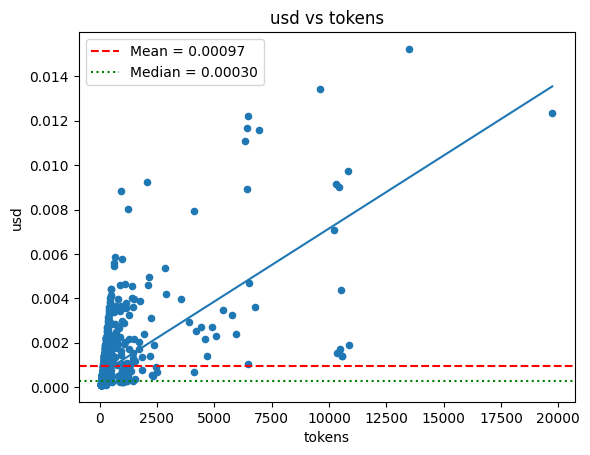

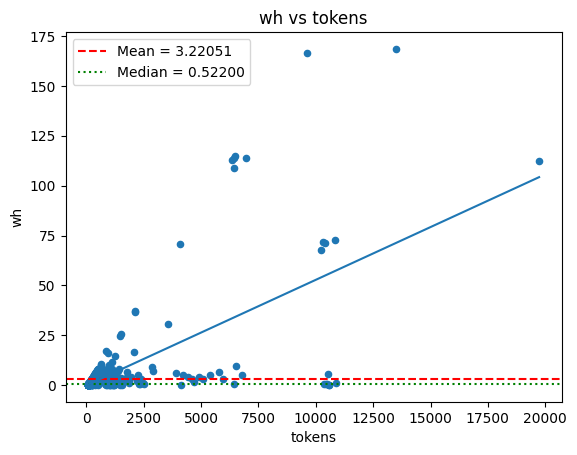

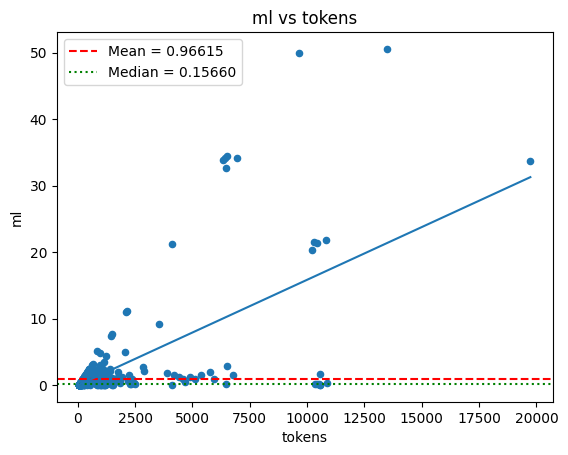

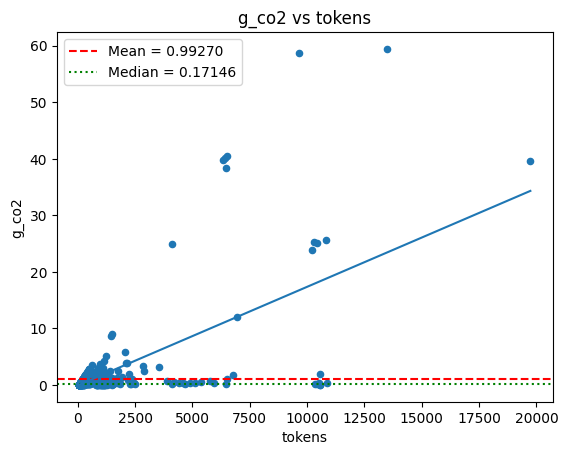

In [6]:
# Tokens vs. resource consumption
for m in ['usd','wh','ml','g_co2']:
    ax = df.plot.scatter(x='tokens', y=m, title=f'{m} vs tokens')
    mean_y = df[m].mean()
    med_y = df[m].median()
    ax.axhline(mean_y, color='r', linestyle='--', label='Mean = {:.5f}'.format(mean_y))
    ax.axhline(med_y, color='g', linestyle=':', label='Median = {:.5f}'.format(med_y))

    # Simple linear fit
    t = df['tokens'].to_numpy(); y = df[m].to_numpy()
    if np.isfinite(t).all() and np.isfinite(y).all() and t.sum() > 0:
        b1, b0 = np.polyfit(t, y, 1)
        xs = np.linspace(t.min(), t.max(), 100)
        ax.plot(xs, b1*xs + b0)
    ax.legend()
    plt.show()

In [ ]:
# Data are clustered around smaller token values (x-axis) due to shorter queries during testing
# However, there is a clear linear fit for each variable (positive relationship between resource consumption and token usage)